<a href="https://colab.research.google.com/github/ishankarve/Linear_Regression_Assignment/blob/main/Bike%20Sharing%20Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective**
Build a multiple linear regression model for the prediction of demand for shared bikes. 

### **Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 


### **Business Goal**

Find variables are significant in predicting the demand for shared bikes and how well those variables describe the bike demands
Based on various **meteorological surveys** and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Based on the goal mentioned above, model the demand for shared bikes with the available independent variables.

### **Data Caveats**

1.   In the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as described in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building.

2.  The column 'yr' has two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


### **Model Building**

In the dataset provided,there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. ***The model should be built taking this 'cnt' as the target variable.***

### **Step 1: Import Libraries**


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### **Step 2: Import Data**

In [93]:
#import data from gihub link
df_bikeshare=pd.read_csv("https://raw.githubusercontent.com/ishankarve/Linear_Regression_Assignment/main/day.csv")

In [94]:
df_bikeshare.head(730)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# **Data Dictionary**
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### **Step 3: Undertake sanity checks on data**

In [95]:
#get shape of the dataframe
df_bikeshare.shape

(730, 16)

In [96]:
#check column dtypes
df_bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [97]:
#get list of unique variables per column
print(df_bikeshare.nunique())

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


In [98]:
# get count of non-na values across all columns
df_bikeshare.apply(lambda x: x.count(), axis=0)

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

#### <span style="color:blue">Inference: </span><span style="color:green">There are no non-na values in the dataset</span> 

In [99]:
# convert 'dteday' from 'object' to 'datetime'
df_bikeshare['dteday'] = pd.to_datetime(df_bikeshare['dteday'], format='%d-%m-%Y') #date is in 01-01-2018 format

In [100]:
#describe dataframe
df_bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Step 4: Cleaning & Binning Numerical Categorical Data**

In [101]:
#using 'OR' operation for holiday and working day to make holiday column redundant
df_bikeshare['workingday']=df_bikeshare['workingday'] + df_bikeshare['holiday']
#drop 'holiday' column
df_bikeshare.drop(['holiday'], axis = 1, inplace = True)


In [102]:
#extracting day from date
df_bikeshare["day"]=df_bikeshare.dteday.dt.day

In [103]:
#binning weekday  into labelled bins
bin_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
bins = [-1,0,1,2,3,4,5,6]
df_bikeshare['weekday_binned'] = pd.cut(df_bikeshare['weekday'], bins=bins, labels=bin_labels)

In [104]:
#binning months into labelled months)
bin_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_bikeshare['mnth_binned'] = pd.cut(df_bikeshare['mnth'], bins=bins, labels=bin_labels)

In [105]:
#binning months into labelled months)
bin_labels = ['Clear', 'Cloudy', 'Light_RainSnow', 'Heavy_RainSnow']
bins = [0, 1, 2, 3, 4]
df_bikeshare['weathersit_binned'] = pd.cut(df_bikeshare['weathersit'], bins=bins, labels=bin_labels)

In [106]:
#binning seasons into labelled variables
bin_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
bins = [0, 1, 2, 3, 4]
df_bikeshare['season_binned'] = pd.cut(df_bikeshare['season'], bins=bins, labels=bin_labels)

### **Step 5: Prelimnary Visualisation**
Since all data is numeric, we can use plots to visualise data 

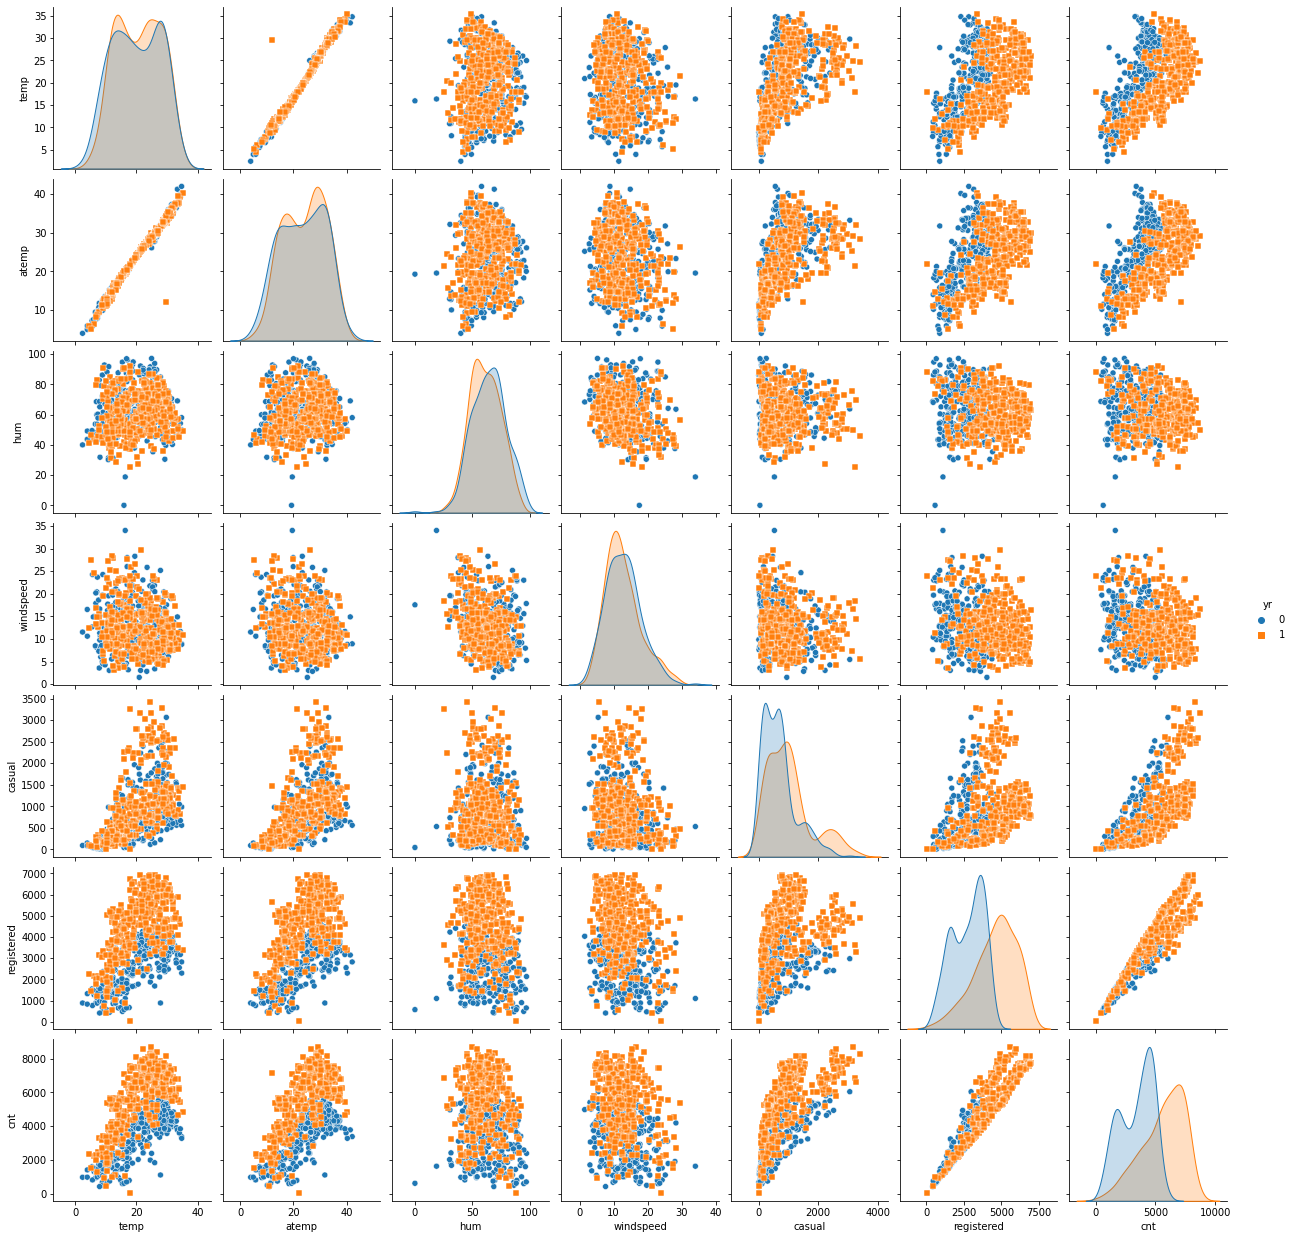

In [107]:
#plotting pairplot of continious variables
#Reference: https://stackoverflow.com/questions/64556501/plot-only-some-columns-with-seaborn-pairplot
cols_to_plot = df_bikeshare.columns[8:15].tolist() + ['yr'] # explicitly add the column "yr" to your list of columns to plot
sns.pairplot(df_bikeshare[cols_to_plot], hue ="yr", markers=["o", "s"])
plt.show()


#### <span style="color:blue">Inference: </span><span style="color:green">Strong correlation observed between `atemp` and `temp` and `registered` and `cnt` variables</span> 

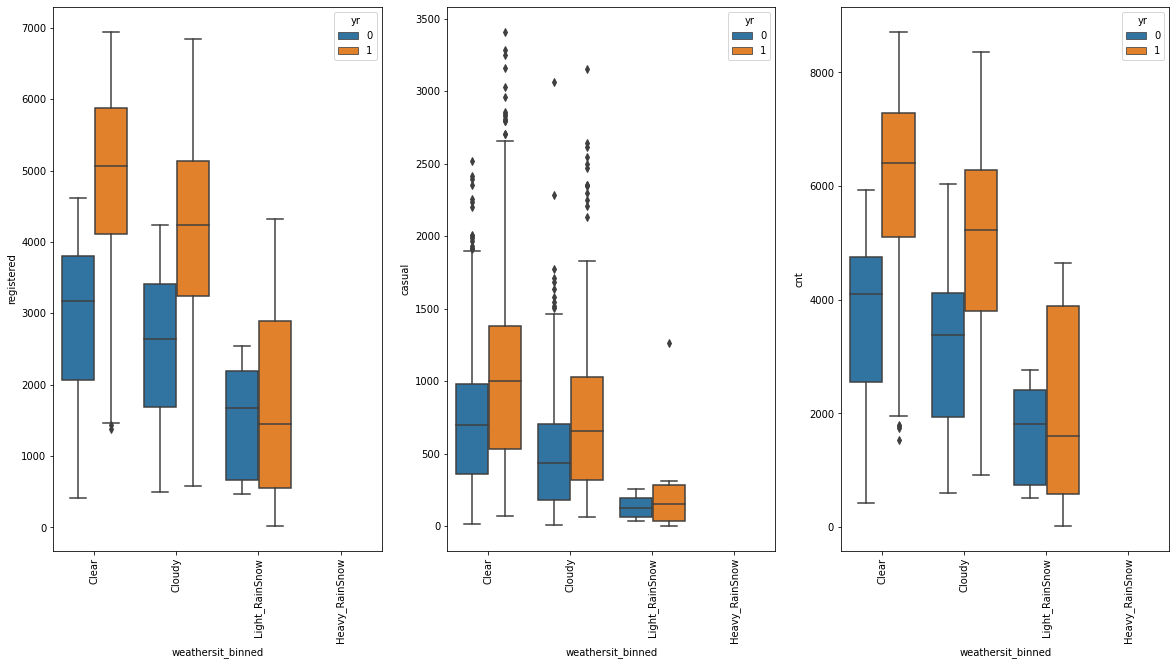

In [108]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weathersit_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weathersit_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Demand is strong when `weathersit` is either `clear` or `cloudy` adn it deteroriates thereafter. No demand during inclement weather</span> 

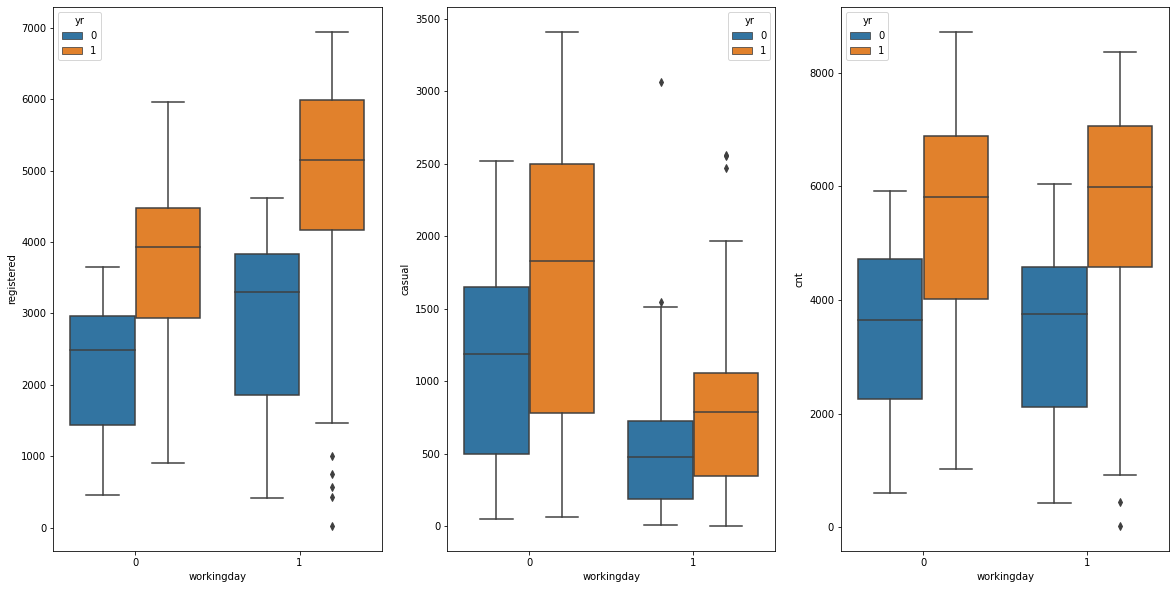

In [109]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'workingday', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'workingday', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Overall demand is constant irrespective whether the day is a working day or not, however `casual` ridership increases on holidays at the cost of `registered` ridership</span> 

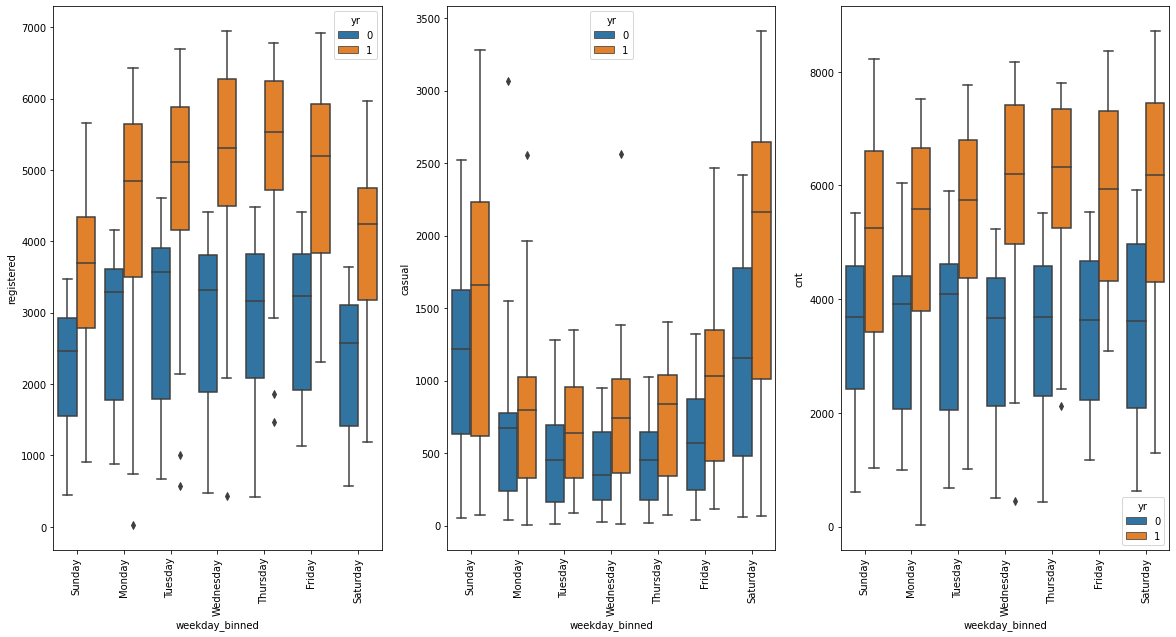

In [110]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'weekday_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.subplot(1,3,3)
sns.boxplot(x = 'weekday_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.xticks(rotation='vertical')
plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Overall demand is constant over the week, however `casual` ridership increases on weekends at the cost of `registered` ridership</span> 

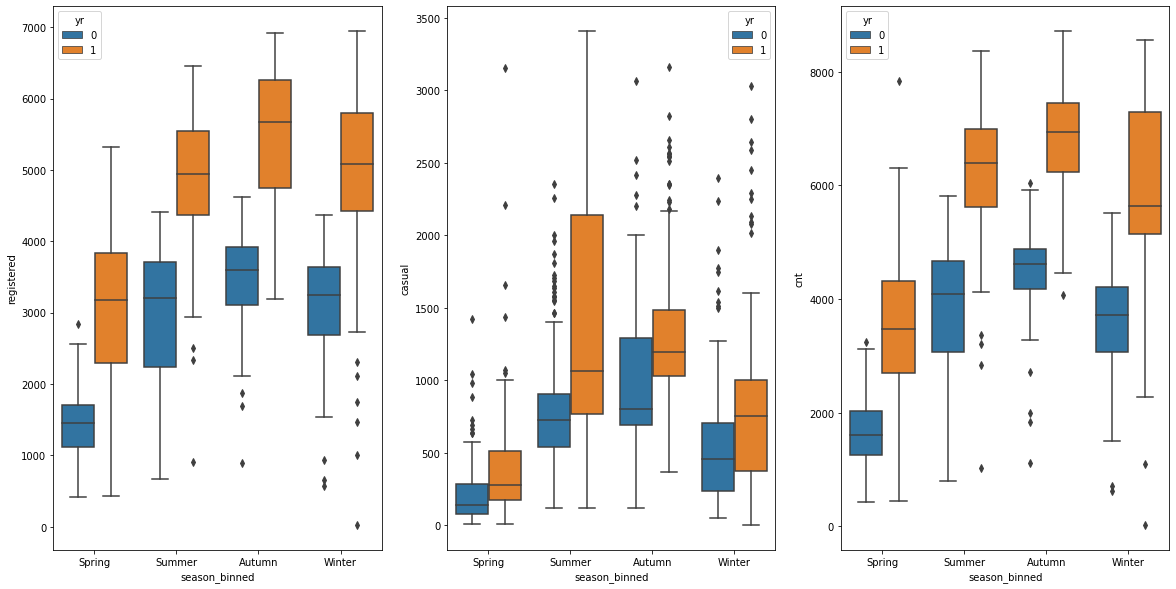

In [111]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'season_binned', y = 'registered', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'season_binned', y = 'casual', hue = 'yr', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'season_binned', y = 'cnt', hue = 'yr', data = df_bikeshare)
plt.show()

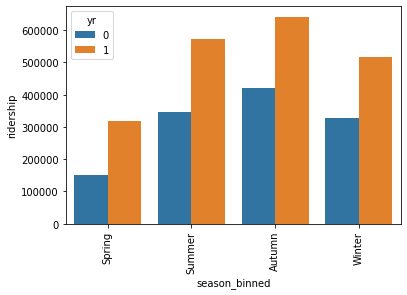

In [112]:
#plot variation across seasons
# perform groupby
df = df_bikeshare.groupby(['season_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="season_binned",y="ridership",hue="yr",data=df)
plt.xticks(rotation='vertical')
plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Demand increases after `Spring`, however significant rise in ridership observed for `casual` riders in Sumer and Autumn</span> 

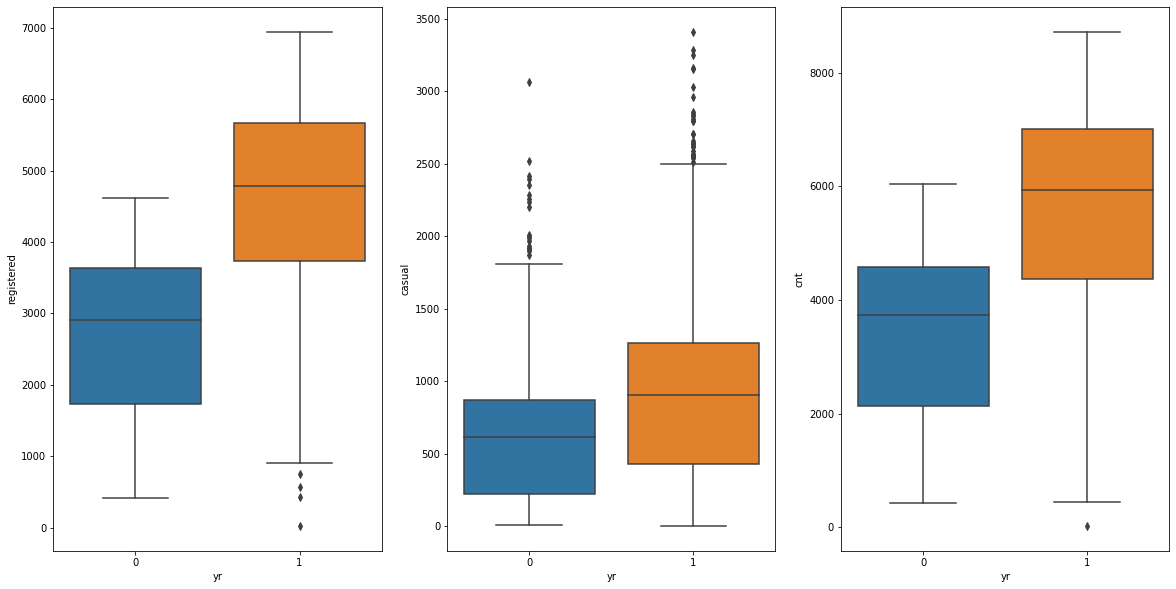

In [113]:
#plotting data for comparative analysis
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'registered', data = df_bikeshare)
plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = df_bikeshare)
plt.subplot(1,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikeshare)
plt.show()

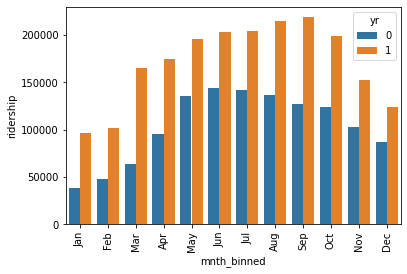

In [114]:
#plot variation across months
# perform groupby
df = df_bikeshare.groupby(['mnth_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="mnth_binned",y="ridership",hue="yr",data=df)
plt.xticks(rotation='vertical')
plt.show()

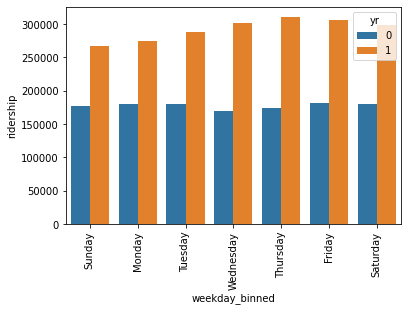

In [115]:
#plot variation across weekdays
# perform groupby
df = df_bikeshare.groupby(['weekday_binned','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
# plot barplot
sns.barplot(x="weekday_binned",y="ridership",hue='yr',data=df)
plt.xticks(rotation='vertical')
plt.show()

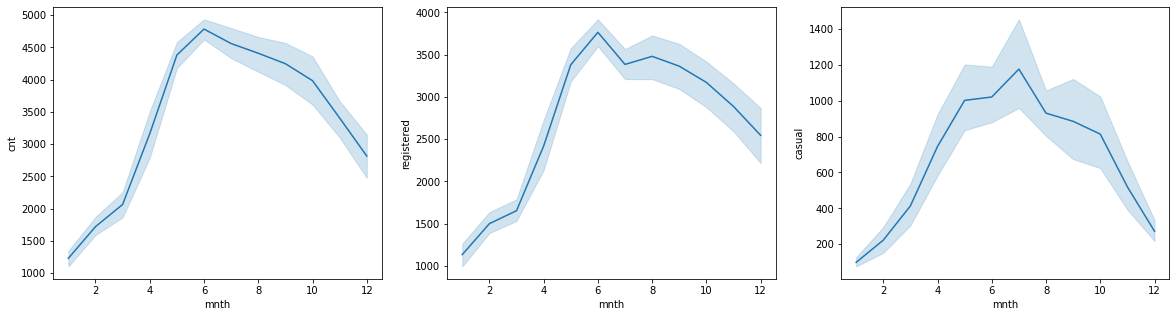

In [116]:
#check relationship of casual, registered and total cnt
df = df_bikeshare.query("yr == 0")
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.lineplot(data=df, x="mnth", y="cnt")
plt.subplot(1,3,2)
sns.lineplot(data=df, x="mnth", y="registered")
plt.subplot(1,3,3)
sns.lineplot(data=df, x="mnth", y="casual")
plt.show()

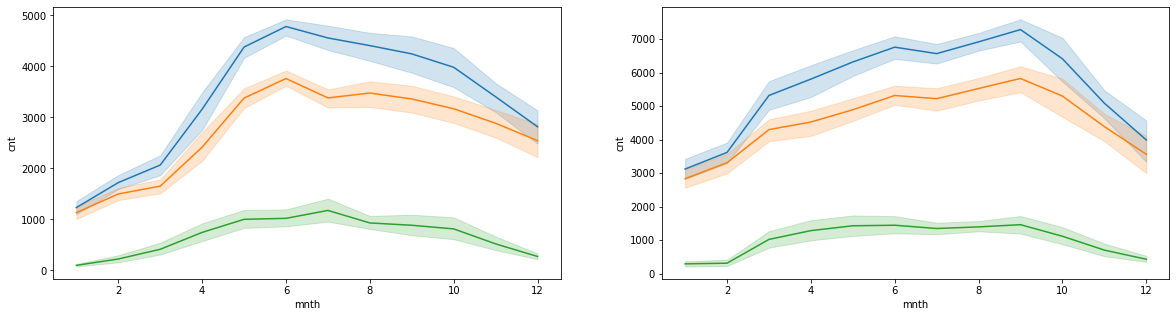

In [117]:
#to ascertain relationship check with normalised values
#set up scaler
plot_scaler = MinMaxScaler()
plt.figure(figsize=(20, 5))
# Apply scaler() only to three specific columns
num_vars=["casual","registered","cnt"]
df[num_vars] = plot_scaler.fit_transform(df[num_vars])

plt.subplot(1,2,1)
df = df_bikeshare.query("yr == 0")
sns.lineplot(data=df, x="mnth", y="cnt")
sns.lineplot(data=df, x="mnth", y="registered")
sns.lineplot(data=df, x="mnth", y="casual")

plt.subplot(1,2,2)
df = df_bikeshare.query("yr == 1")
sns.lineplot(data=df, x="mnth", y="cnt")
sns.lineplot(data=df, x="mnth", y="registered")
sns.lineplot(data=df, x="mnth", y="casual")

plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Variables `registered` and `cnt` appear to be correlated, however `casual` only follows the overall trend and doesnt replicate the trend</span> 

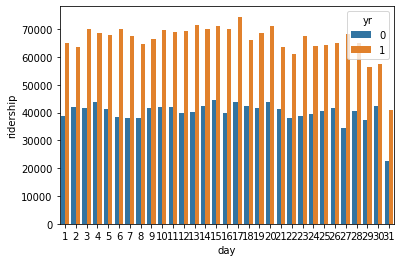

In [118]:
#plot variation across day
# perform groupby
df = df_bikeshare.groupby(['day','yr']).agg(ridership=("cnt", 'sum'))
df = df.reset_index()
  
#plot barplot
sns.barplot(x="day",y="ridership",hue='yr',data=df)

plt.show()

#### <span style="color:blue">Inference: </span><span style="color:green">Variabe `day` does'nt vary vary much across its value.</span> 

In [119]:
#get number of unique values per column
print(df_bikeshare.nunique())

instant              730
dteday               730
season                 4
yr                     2
mnth                  12
weekday                7
workingday             2
weathersit             3
temp                 498
atemp                689
hum                  594
windspeed            649
casual               605
registered           678
cnt                  695
day                   31
weekday_binned         7
mnth_binned           12
weathersit_binned      3
season_binned          4
dtype: int64


In [120]:
#get list of columns in the data frame
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'weekday_binned', 'mnth_binned',
       'weathersit_binned', 'season_binned'],
      dtype='object')

### **Step 6: Creating Dummy Variables**

In [121]:
#create dummy variables for binned categorial variables
weathersit_dummy = pd.get_dummies(df_bikeshare['weathersit_binned'],drop_first=True)
weekday_dummy = pd.get_dummies(df_bikeshare['weekday_binned'],drop_first=True)
mnth_dummy = pd.get_dummies(df_bikeshare['mnth_binned'],drop_first=True)
season_dummy = pd.get_dummies(df_bikeshare['season_binned'],drop_first=True)

In [122]:
#drop corresponding categorical variables, undertake regex to search for column having '_binned' in the tail segment. 
#Reference: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
df_bikeshare.drop(list(df_bikeshare.filter(regex = 'binned')), axis = 1, inplace = True)

In [123]:
#check dataframe for columns deletion
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [124]:
#check no of unique variables of dummy dataframes created
print(weathersit_dummy.nunique())
print(weekday_dummy.nunique())
print(mnth_dummy.nunique())
print(season_dummy.nunique())

Cloudy            2
Light_RainSnow    2
Heavy_RainSnow    1
dtype: int64
Monday       2
Tuesday      2
Wednesday    2
Thursday     2
Friday       2
Saturday     2
dtype: int64
Feb    2
Mar    2
Apr    2
May    2
Jun    2
Jul    2
Aug    2
Sep    2
Oct    2
Nov    2
Dec    2
dtype: int64
Summer    2
Autumn    2
Winter    2
dtype: int64


In [125]:
#concat dummy variable dataframe to the main dataframe
df_bikeshare = pd.concat([df_bikeshare, weathersit_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, weekday_dummy], axis = 1)                         
df_bikeshare = pd.concat([df_bikeshare, mnth_dummy], axis = 1)
df_bikeshare = pd.concat([df_bikeshare, season_dummy], axis = 1)

In [126]:
#check dataframe for columns concatenation
df_bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'Cloudy', 'Light_RainSnow',
       'Heavy_RainSnow', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [127]:
#drop columns where there is no variable diversity; i.e no of unique variables =1
for col in df_bikeshare.columns:
    if len(df_bikeshare[col].unique()) == 1:
        df_bikeshare.drop(col,inplace=True,axis=1)

In [128]:
#check master dataframe for dropping pf columns
print(df_bikeshare.nunique())


instant           730
dteday            730
season              4
yr                  2
mnth               12
weekday             7
workingday          2
weathersit          3
temp              498
atemp             689
hum               594
windspeed         649
casual            605
registered        678
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [129]:
#get list of dataframe columns
df_bikeshare.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day',
 'Cloudy',
 'Light_RainSnow',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Summer',
 'Autumn',
 'Winter']

In [130]:
#only drop unrequired columns, remaining will be dropped programatically
df_bikeshare.drop([
'instant',      #not related hence dropped
 'dteday',      #already processed hence dropped
  'season',     #dummy variables created hence dropped
  'yr',         #since nature is binary cannot be utilised for subsequent years, hence dropped
  'mnth',       #dummy variables created hence dropped
  'weekday',    #dummy variables created hence dropped
#  'workingday',
  'weathersit', #dummy variables created hence dropped
#  'temp',
  'atemp',      #strongly correlated with variable `temp`  hence dropped
#  'hum',       
#  'windspeed', 
  'casual',     #data very dynamic and hence not available beforehand hence dropped
#  'registered',
#  'cnt',
#  'day',
#  'Cloudy',
#  'Light_RainSnow',
#  'Heavy_RainSnow',
#  'Monday',
#  'Tuesday',
#  'Wednesday',
#  'Thursday',
#  'Friday',
#  'Saturday',
#  'Feb',
#  'Mar',
#  'Apr',
#  'May',
#  'Jun',
#  'Jul',
#  'Aug',
#  'Sep',
#  'Oct',
#  'Nov',
#  'Dec',
#  'Summer',
#  'Autumn',
#  'Winter'
 ], axis = 1, inplace = True)
df_bikeshare.head(10)

,workingday,temp,hum,windspeed,registered,cnt,day,Cloudy,Light_RainSnow,Monday,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
0,0,14.110847,80.5833,10.749882,654,985,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,670,801,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8.050924,43.7273,16.636703,1229,1349,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,8.200000,59.0435,10.739832,1454,1562,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9.305237,43.6957,12.522300,1518,1600,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,8.378268,51.8261,6.000868,1518,1606,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,8.057402,49.8696,11.304642,1362,1510,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,6.765000,53.5833,17.875868,891,959,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,5.671653,43.4167,24.250650,768,822,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,6.184153,48.2917,14.958889,1280,1321,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Step 7: Splitting and Scaling data**

In [131]:
#check dataframe for final x-check
print(df_bikeshare.nunique())

workingday          2
temp              498
hum               594
windspeed         649
registered        678
cnt               695
day                31
Cloudy              2
Light_RainSnow      2
Monday              2
Tuesday             2
Wednesday           2
Thursday            2
Friday              2
Saturday            2
Feb                 2
Mar                 2
Apr                 2
May                 2
Jun                 2
Jul                 2
Aug                 2
Sep                 2
Oct                 2
Nov                 2
Dec                 2
Summer              2
Autumn              2
Winter              2
dtype: int64


In [132]:
#copy dataframe
s1_df=df_bikeshare.copy()

In [133]:
#splitting data
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(564)
s1_train, s1_test = train_test_split(s1_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [134]:
s1_train.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'registered', 'cnt', 'day',
       'Cloudy', 'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [135]:
#set up scaler
scaler = MinMaxScaler()
num_vars=s1_train.columns.tolist()
#num_vars.remove('cnt')
s1_train[num_vars] = scaler.fit_transform(s1_train[num_vars])

In [136]:
s1_train.head(10)

,workingday,temp,hum,windspeed,registered,cnt,day,Cloudy,Light_RainSnow,Monday,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
653,1.0,0.509887,0.575354,0.300794,0.951776,0.864243,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
576,1.0,0.815169,0.725633,0.264686,0.899220,0.827658,1.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
426,0.0,0.442393,0.640189,0.255342,0.446145,0.465255,0.066667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,0.0,0.245101,0.498067,0.663106,0.203869,0.204096,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
482,0.0,0.395666,0.504508,0.188475,0.444701,0.482973,0.900000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
111,1.0,0.345824,0.751824,0.380981,0.214554,0.191095,0.700000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
580,0.0,0.914852,0.632030,0.462538,0.643806,0.782559,0.100000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500,1.0,0.719639,0.719193,0.172431,0.925931,0.851588,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
479,1.0,0.520271,0.440962,0.164434,0.797141,0.710308,0.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
472,1.0,0.503656,0.586518,0.270032,0.577534,0.499885,0.566667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


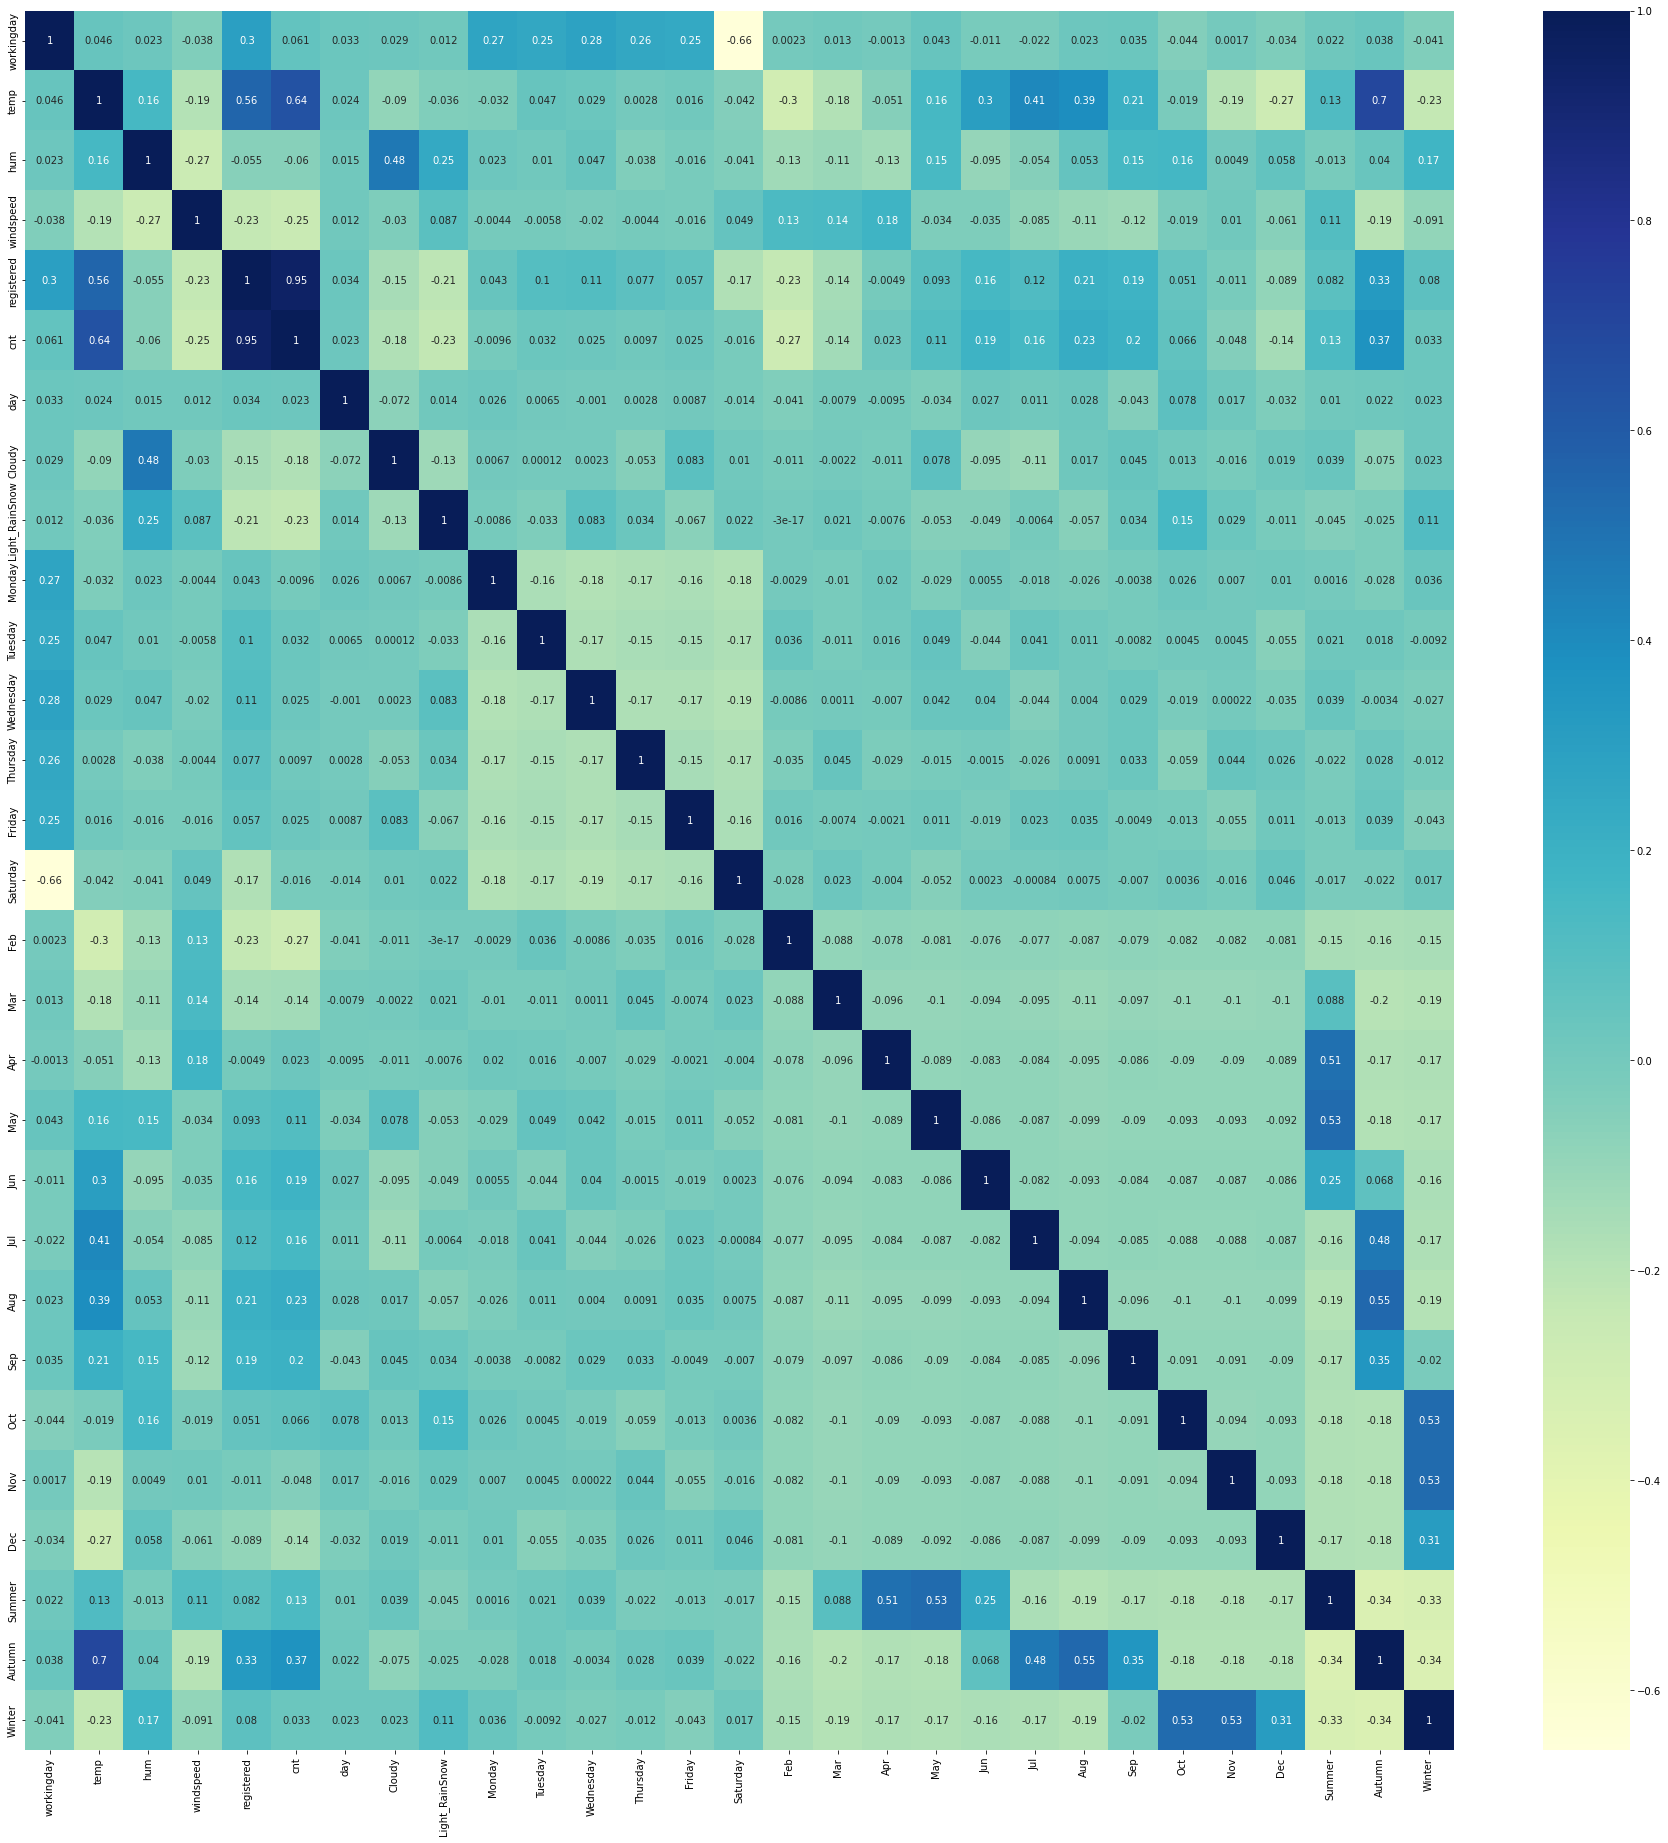

In [137]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 32))
sns.heatmap(s1_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [138]:
#check correlation as a table
s1_train.corr()

,workingday,temp,hum,windspeed,registered,cnt,day,Cloudy,Light_RainSnow,Monday,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
workingday,1.000000,0.046493,0.022694,-0.038106,0.297432,0.061358,0.032926,0.028505,1.193987e-02,0.274778,...,-0.011011,-0.022204,0.023331,0.034995,-0.044068,0.001736,-0.033700,0.022472,0.038349,-0.041129
temp,0.046493,1.000000,0.155415,-0.187396,0.557199,0.643517,0.024255,-0.090161,-3.609266e-02,-0.032126,...,0.302997,0.413929,0.387456,0.207457,-0.018709,-0.194765,-0.272869,0.125582,0.697524,-0.233697
hum,0.022694,0.155415,1.000000,-0.266895,-0.055116,-0.059993,0.014960,0.481042,2.450381e-01,0.022612,...,-0.095033,-0.053838,0.053185,0.152628,0.162014,0.004910,0.057832,-0.013216,0.040371,0.171579
windspeed,-0.038106,-0.187396,-0.266895,1.000000,-0.234840,-0.253794,0.011944,-0.030385,8.689990e-02,-0.004372,...,-0.035012,-0.085478,-0.111243,-0.121734,-0.018973,0.009952,-0.060975,0.110089,-0.194690,-0.090649
registered,0.297432,0.557199,-0.055116,-0.234840,1.000000,0.948361,0.033529,-0.150680,-2.120571e-01,0.043452,...,0.155345,0.123907,0.206097,0.189791,0.051378,-0.011377,-0.089154,0.082490,0.327020,0.080025
cnt,0.061358,0.643517,-0.059993,-0.253794,0.948361,1.000000,0.023184,-0.175530,-2.265984e-01,-0.009552,...,0.187821,0.157812,0.227229,0.201327,0.065692,-0.048130,-0.143598,0.134343,0.371606,0.032636
day,0.032926,0.024255,0.014960,0.011944,0.033529,0.023184,1.000000,-0.071726,1.408971e-02,0.026329,...,0.027445,0.010842,0.027635,-0.043121,0.077761,0.017278,-0.032059,0.010400,0.021928,0.022979
Cloudy,0.028505,-0.090161,0.481042,-0.030385,-0.150680,-0.175530,-0.071726,1.000000,-1.258171e-01,0.006673,...,-0.094983,-0.114731,0.016625,0.044527,0.013268,-0.016152,0.018507,0.039442,-0.074887,0.023127
Light_RainSnow,0.011940,-0.036093,0.245038,0.086900,-0.212057,-0.226598,0.014090,-0.125817,1.000000e+00,-0.008580,...,-0.049393,-0.006422,-0.056753,0.033894,0.153177,0.029177,-0.011056,-0.045231,-0.024817,0.114448
Monday,0.274778,-0.032126,0.022612,-0.004372,0.043452,-0.009552,0.026329,0.006673,-8.580177e-03,1.000000,...,0.005480,-0.018305,-0.025981,-0.003831,0.026467,0.006961,0.010010,0.001623,-0.027766,0.035783


#### Splitting into sub set

In [139]:
y_train = s1_train.pop('cnt')
X_train = s1_train

### Step 8: Building a linear regression model

##### ***Extracting Results from regression model***

In [140]:
#References:-
#https://stackoverflow.com/questions/48522609/how-to-retrieve-model-estimates-from-statsmodels
#https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
#https://stackoverflow.com/questions/37508158/how-to-extract-a-particular-value-from-the-ols-summary-in-pandas
#https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
#https://stackoverflow.com/questions/47388258/how-to-extract-the-regression-coefficient-from-statsmodels-api
#https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe/52976810

#### ***Function for comparative analysis with RFE***

In [141]:
def RFE_analysis(X_df,y_df,num_features):
    lm = LinearRegression()
    lm.fit(X_df, y_df)
     #for starts limit the no of features selected to that gereated in recursive VIF
    rfe = RFE(lm, n_features_to_select=num_features)
    rfe = rfe.fit(X_df, y_df)
    list(zip(X_df.columns,rfe.support_,rfe.ranking_))
    support_col = X_df.columns[rfe.support_]
    unsuport_col=X_df.columns[~rfe.support_]
    return support_col,unsuport_col

In [142]:
 #Obtain regression model coefficients from statsmodels 
 #Reference: https://gist.github.com/zhiyzuo/972b8b95e115c44d6805c929b7b4e2ca
def get_coef_table(lin_reg):
    ''' lin_reg is a fitted statsmodels regression model
    Return a dataframe containing coefficients, pvalues, and the confidence intervals
    '''
    err_series = lin_reg.params - lin_reg.conf_int()[0]
    coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                            'ci_err': err_series.values[1:],
                            'pvalue': lin_reg.pvalues.round(4).values[1:],
                            'varname': err_series.index.values[1:]
                           })
    return coef_df

In [143]:
#create a function to undertake linear_regression and undertake analysis
def linear_regression(df_indices,df_Xtrain,df_ytrain):
    #undertake regression
    X_train_lm = df_Xtrain[df_indices]
    X_train_lm = sm.add_constant(X_train_lm)
    lr_results = sm.OLS(df_ytrain, X_train_lm).fit() #create model
    #calculate VIF
    vif = pd.DataFrame()
    vif['varname'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif=vif.set_index('varname')#change df index to varname
    #process lr summary results
    df_lr_sum=get_coef_table(lr_results)#This works better :-)!
    df_lr_sum.set_index('varname')#change df index to varname
    df_lr_sum = df_lr_sum.sort_values(by=['pvalue'], ascending=False)#sort the dataframe by p value and in descending order
    #to undertake holistic analysis look at VIF and P values
    lr_sum=df_lr_sum.merge(vif, on='varname', how='left')#join both dataframes 
    lr_sum=lr_sum.set_index('varname')
    return lr_results, vif, lr_sum

In [144]:
def iterate_recursion(feature_index,Xtrain,ytrain):
    lr,vif,lr_summary =linear_regression(feature_index,Xtrain,ytrain)
    #print ("Length of index is {}\n\r".format(len(feature_index)))
    lr_summary.sort_values(by=['VIF'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    lr_summary=lr_summary.reset_index()
    print(lr_summary)
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    feature_vif=lr_summary.VIF.iloc[0]
    if (feature_vif>=4.99):
        #print("VIF of {} is {}(>4)".format(top_feature,feature_vif))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    
    lr_summary.sort_values(by=['pvalue'], ascending=False, inplace=True)#sort the dataframe by vif and in descending order
    ##testing recursive modelling to save time
    top_feature=lr_summary.varname.iloc[0]
    feature_pvalue=lr_summary.pvalue.iloc[0]
    if (feature_pvalue>=0.05):
        #print("p value of {} is {}(>0.05)".format(top_feature,feature_pvalue))
        #print("dropping feature {} and redoing regression..".format(top_feature))
        #drop feature from index
        feature_index=feature_index.drop(top_feature)
        #recurse regression
        lr,vif,lr_summary,feature_index=iterate_recursion(feature_index,Xtrain,ytrain)
    print ("Final feature count is {}".format(len(feature_index)))
    return lr,vif,lr_summary,feature_index



#### ***Iteration 1: Undertake feature analysis based on VIF and p value***

In [145]:
iv=s1_train.columns
regression_summary,VIF,feature_summary,feature_list =iterate_recursion(iv,X_train,y_train)
print (VIF)

           varname      coef    ci_err  pvalue    VIF
0       workingday -0.086960  0.008767  0.0000    inf
1           Monday -0.009378  0.008041  0.0224    inf
2          Tuesday -0.026123  0.008534  0.0000    inf
3        Wednesday -0.027946  0.007982  0.0000    inf
4         Thursday -0.020803  0.008534  0.0000    inf
5           Friday -0.002710  0.008661  0.5390    inf
6           Autumn -0.004532  0.025920  0.7314  11.39
7              Aug -0.001009  0.035932  0.9560   9.81
8              Jul -0.010449  0.037787  0.5871   8.83
9           Winter -0.022484  0.022876  0.0540   8.56
10            temp  0.138820  0.041405  0.0000   7.64
11          Summer  0.022802  0.020483  0.0292   6.79
12             Jun -0.011734  0.033427  0.4907   6.74
13             Sep  0.017969  0.032265  0.2744   6.74
14             May -0.002991  0.031070  0.8500   6.52
15             Oct  0.040661  0.029646  0.0073   6.06
16             Nov  0.022477  0.028222  0.1183   5.50
17             Apr  0.011784

#### ***Iteration2: Undertake Recursive Feature Analysis with RFE selected features***

In [146]:
feature2select=15 #arbitary Figure
features_supported,features_rejected=RFE_analysis(X_train,y_train,feature2select)
print("No of supported features are {},{}n".format(len(features_supported),features_supported))
regression_summary_RFE,VIF_RFE,feature_summary_RFE,feature_list_RFE =iterate_recursion(features_supported,X_train,y_train)
print (VIF_RFE)

No of supported features are 15,Index(['workingday', 'temp', 'hum', 'windspeed', 'registered',
       'Light_RainSnow', 'Tuesday', 'Wednesday', 'Mar', 'Apr', 'Sep', 'Oct',
       'Nov', 'Summer', 'Winter'],
      dtype='object')n
           varname      coef    ci_err  pvalue   VIF
0           Winter -0.021391  0.014513  0.0039  3.43
1       registered  0.912082  0.022052  0.0000  2.20
2              Oct  0.045276  0.017489  0.0000  2.10
3             temp  0.126424  0.021585  0.0000  2.07
4              Nov  0.024425  0.017235  0.0056  2.04
5           Summer  0.023748  0.010101  0.0000  1.64
6              Apr  0.016085  0.015441  0.0412  1.50
7              hum -0.045637  0.027180  0.0010  1.37
8       workingday -0.102534  0.008662  0.0000  1.37
9        windspeed -0.052243  0.022127  0.0000  1.23
10  Light_RainSnow -0.019730  0.021848  0.0766  1.19
11             Sep  0.021533  0.013610  0.0020  1.19
12       Wednesday -0.016613  0.010079  0.0013  1.18
13             Mar  0.018849

#### ***Build model based on values derived in Iteration 1***

In [147]:
X_train_lm = X_train[feature_list]
X_train_lm = sm.add_constant(X_train_lm)
lr_final = sm.OLS(y_train, X_train_lm).fit()
y_train_cnt = lr_final.predict(X_train_lm)
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     791.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:18:38   Log-Likelihood:                 919.67
No. Observations:                 510   AIC:                            -1799.
Df Residuals:                     490   BIC:                            -1715.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0782      0.007     10.899      0.000       0.064       0.092
windspeed         -0.0408      0.011     -3.607      0.000      -0.063      -0.019
registered         0.9252      0.011     87.210      0.000       0.904       0.946
Cloudy            -0.0136      0.004     -3.384      0.001      -0.021      -0.006
Light_RainSnow    -0.0304      0.012     -2.629      0.009      -0.053      -0.008
Monday            -0.1017      0.006    -17.369      0.000      -0.113      -0.090
Tuesday           -0.1171      0.006    -18.931      0.000      -0.129      -0.105
Wednesday         -0.1193      0.006    -20.252      0.000      -0.131      -0.108
Thursday          -0.1112      0.006    -18.002      0.000      -0.123      -0.099
Friday            -0.0941      0.006    -15.097      0.000      -0.106      -0.082
Mar                0.0430      0.008      5.619      0.000       0.028       0.058
Apr                0.0524      0.012      4.409      0.000       0.029       0.076
May                0.0549      0.012      4.660      0.000       0.032       0.078
Jun                0.0619      0.010      6.237      0.000       0.042       0.081
Jul                0.0690      0.008      8.602      0.000       0.053       0.085
Aug                0.0693      0.008      9.155      0.000       0.054       0.084
Sep                0.0683      0.008      8.444      0.000       0.052       0.084
Oct                0.0534      0.008      6.944      0.000       0.038       0.069
Nov                0.0201      0.007      2.725      0.007       0.006       0.035
Summer             0.0182      0.009      2.017      0.044       0.000       0.036
==============================================================================
Omnibus:                       88.277   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.303
Skew:                           0.974   Prob(JB):                     6.34e-38
Kurtosis:                       5.066   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***Build model based on values derived in Iteration 2***

In [148]:
#build  model based on RFE common analysis
X_train_lm_RFE_eval = X_train[feature_list_RFE]
X_train_lm_RFE_eval = sm.add_constant(X_train_lm_RFE_eval)
lr_final_RFE_eval = sm.OLS(y_train, X_train_lm_RFE_eval).fit()
y_train_cnt_RFE_eval = lr_final_RFE_eval.predict(X_train_lm_RFE_eval)
lr_final_RFE_eval.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1251.
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:18:38   Log-Likelihood:                 936.20
No. Observations:                 510   AIC:                            -1844.
Df Residuals:                     496   BIC:                            -1785.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0853      0.012      7.238      0.000       0.062       0.109
workingday    -0.1032      0.004    -23.356      0.000      -0.112      -0.094
temp           0.1213      0.011     11.162      0.000       0.100       0.143
hum           -0.0528      0.014     -3.879      0.000      -0.079      -0.026
windspeed     -0.0517      0.011     -4.619      0.000      -0.074      -0.030
registered     0.9171      0.011     83.512      0.000       0.896       0.939
Tuesday       -0.0145      0.006     -2.635      0.009      -0.025      -0.004
Wednesday     -0.0176      0.005     -3.426      0.001      -0.028      -0.008
Mar            0.0155      0.006      2.524      0.012       0.003       0.028
Sep            0.0214      0.007      3.080      0.002       0.008       0.035
Oct            0.0443      0.009      4.972      0.000       0.027       0.062
Nov            0.0239      0.009      2.714      0.007       0.007       0.041
Summer         0.0290      0.004      6.480      0.000       0.020       0.038
Winter        -0.0226      0.007     -3.056      0.002      -0.037      -0.008
==============================================================================
Omnibus:                       73.236   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.629
Skew:                           0.881   Prob(JB):                     1.43e-27
Kurtosis:                       4.648   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

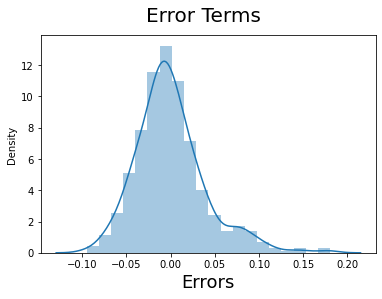

In [149]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

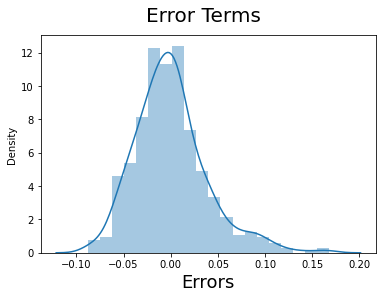

In [150]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_RFE_eval), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

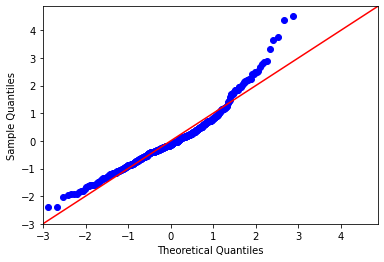

In [151]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

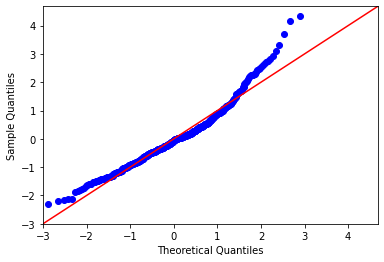

In [152]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_train - y_train_cnt_RFE_eval), fit=True, line='45')
plt.show()

### **Step 9: Making prediction based on model coeff.**

###### ***Scaling Test Set***

In [153]:
num_vars=s1_test.columns.tolist()
#num_vars.remove('cnt')
s1_test[num_vars] = scaler.transform(s1_test[num_vars])

In [154]:
s1_test.describe()

,workingday,temp,hum,windspeed,registered,cnt,day,Cloudy,Light_RainSnow,Monday,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Summer,Autumn,Winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.735160,0.558941,0.638508,0.313350,0.527146,0.520592,0.500609,0.319635,0.027397,0.127854,...,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.264840,0.246575,0.232877
std,0.442259,0.233698,0.148974,0.159947,0.217921,0.218435,0.285836,0.467403,0.163612,0.334692,...,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.442259,0.432005,0.423633
min,0.000000,0.046591,0.261915,-0.042808,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354650,0.527265,0.198517,0.359154,0.377531,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.558691,0.627737,0.299459,0.526567,0.524275,0.466667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.759096,0.743928,0.403048,0.664742,0.672745,0.766667,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,0.984424,1.002146,0.807474,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### ***Splitting Test Data***

In [155]:
y_test = s1_test.pop('cnt')
X_test = s1_test

In [156]:
X_test.columns

Index(['workingday', 'temp', 'hum', 'windspeed', 'registered', 'day', 'Cloudy',
       'Light_RainSnow', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Summer', 'Autumn', 'Winter'],
      dtype='object')

In [157]:
#adding constant
X1_test = X_test[feature_list]
X1_test = sm.add_constant(X1_test)

X2_test = X_test[feature_list_RFE]
X2_test = sm.add_constant(X2_test)


In [158]:
# Making predictions using model

y_pred1 = lr_final.predict(X1_test)
y_pred2 = lr_final_RFE_eval.predict(X2_test)

In [159]:
lr_final.params

const             0.078225
windspeed        -0.040772
registered        0.925180
Cloudy           -0.013576
Light_RainSnow   -0.030426
Monday           -0.101736
Tuesday          -0.117084
Wednesday        -0.119325
Thursday         -0.111238
Friday           -0.094055
Mar               0.042979
Apr               0.052355
May               0.054857
Jun               0.061877
Jul               0.068961
Aug               0.069334
Sep               0.068313
Oct               0.053411
Nov               0.020094
Summer            0.018248
dtype: float64

In [160]:
lr_final_RFE_eval.params

const         0.085335
workingday   -0.103174
temp          0.121348
hum          -0.052767
windspeed    -0.051651
registered    0.917102
Tuesday      -0.014499
Wednesday    -0.017596
Mar           0.015502
Sep           0.021383
Oct           0.044325
Nov           0.023922
Summer        0.028959
Winter       -0.022633
dtype: float64

### **Step 10: Model Evaluation**

```
Reference:
https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
```



Text(0, 0.5, 'y_pred1')

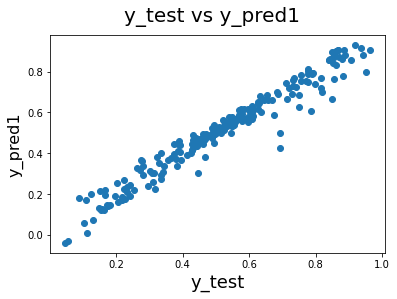

In [161]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_pred1', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred1', fontsize = 16)      


Text(0, 0.5, 'y_pred2')

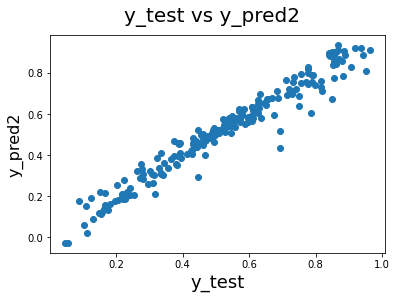

In [162]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred2', fontsize = 16)      


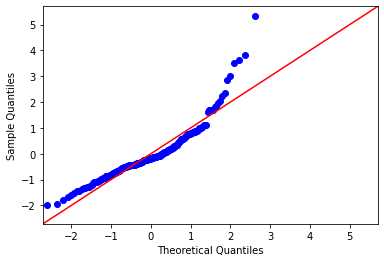

In [163]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_test - y_pred1), fit=True, line='45')
plt.show()

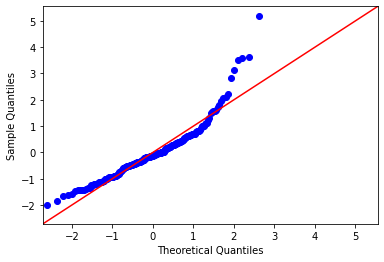

In [164]:
#Reference: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot
#           https://stats.stackexchange.com/questions/111010/interpreting-qqplot-is-there-any-rule-of-thumb-to-decide-for-non-normality/111013#111013

sm.qqplot((y_test - y_pred2), fit=True, line='45')
plt.show()

Text(0.5, 0, 'Errors')

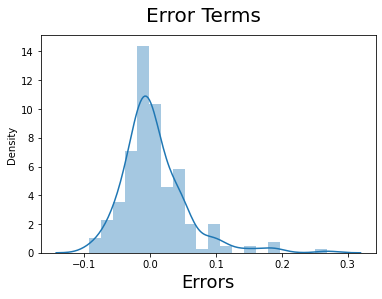

In [165]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Text(0.5, 0, 'Errors')

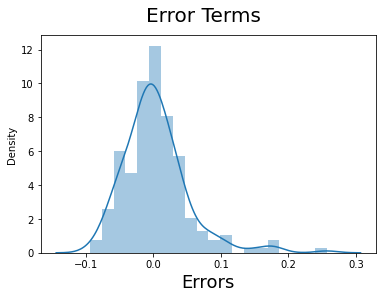

In [166]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

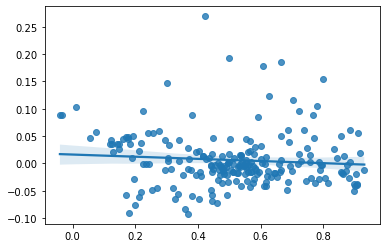

In [167]:
#plt.scatter(y_pred,(y_test - y_pred))
#plt.show()
sns.regplot(y_pred1,y_test-y_pred1,'r')
plt.show()

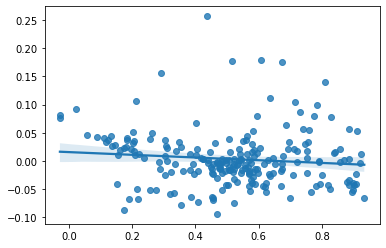

In [168]:
#plt.scatter(y_pred,(y_test - y_pred))
#plt.show()
sns.regplot(y_pred2,y_test-y_pred2,'r')
plt.show()

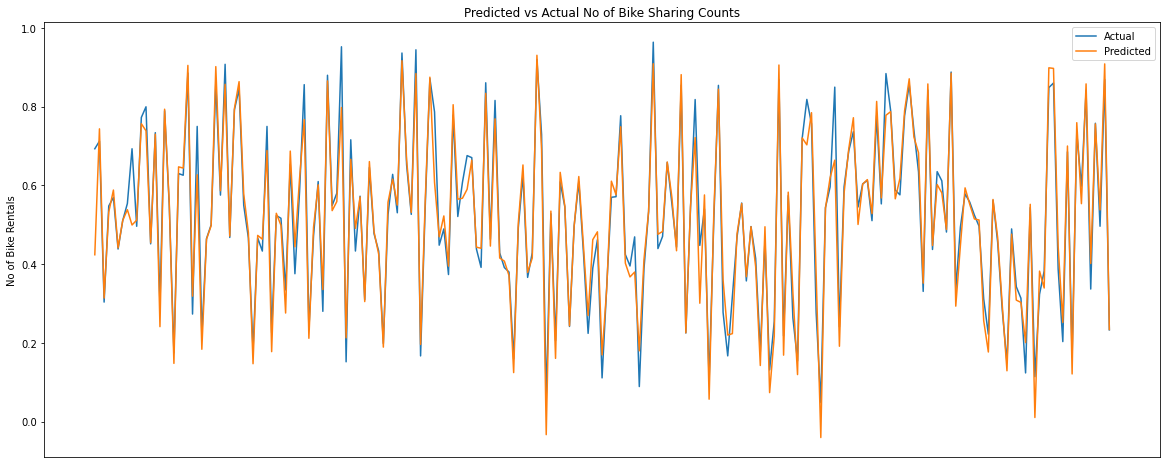

In [169]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred1)),y_pred1)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


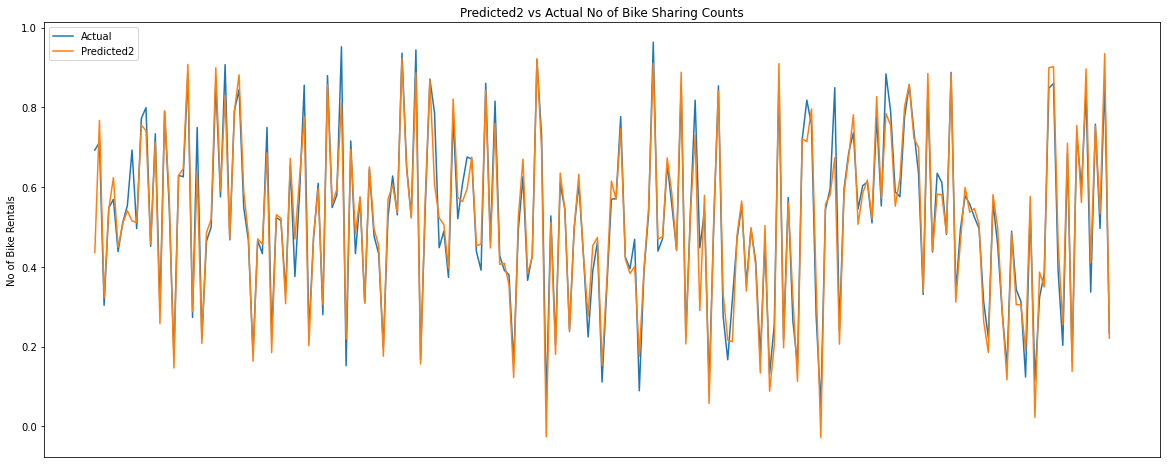

In [170]:
# Plotting Actual vs Predicted No of Shares 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred2)),y_pred2)
plt.legend([l1,l2],['Actual','Predicted2'])
plt.title('Predicted2 vs Actual No of Bike Sharing Counts');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


### ***Regression Metrics***

In [171]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt)
mae_train = mean_absolute_error(y_train, y_train_cnt)
mse_test = mean_squared_error(y_test, y_pred1)
mae_test = mean_absolute_error(y_test, y_pred1)
r2_test = r2_score(y_test, y_pred1)
r2_train = r2_score(y_train, y_train_cnt)
MAPE_test = np.mean(np.abs(y_pred1 - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))
print ('\nFinal Parameters for Model 1 based only on VIF analysis are :\n{}'.format(lr_final.params))

R-squared for train data: 0.97
R-squared for test data: 0.95
Mean Squared Error for train data 0.002
Mean Absolute Error for train data 0.029
Mean Squared Error for test data 0.002
Mean Absolute Error for test data 0.033
Mean Absolute Percentage Error for test data 0.104
Mean Absolute Percentage Error for train data 5.621

Final Parameters for Model 1 based only on VIF analysis are :
const             0.078225
windspeed        -0.040772
registered        0.925180
Cloudy           -0.013576
Light_RainSnow   -0.030426
Monday           -0.101736
Tuesday          -0.117084
Wednesday        -0.119325
Thursday         -0.111238
Friday           -0.094055
Mar               0.042979
Apr               0.052355
May               0.054857
Jun               0.061877
Jul               0.068961
Aug               0.069334
Sep               0.068313
Oct               0.053411
Nov               0.020094
Summer            0.018248
dtype: float64


In [172]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train = mean_squared_error(y_train, y_train_cnt_RFE_eval)
mae_train = mean_absolute_error(y_train, y_train_cnt_RFE_eval)
mse_test = mean_squared_error(y_test, y_pred2)
mae_test = mean_absolute_error(y_test, y_pred2)
r2_test = r2_score(y_test, y_pred2)
r2_train = r2_score(y_train, y_train_cnt_RFE_eval)
MAPE_test = np.mean(np.abs(y_pred2 - y_test) / (y_test + 1e-5))
MAPE_train = np.mean(np.abs(y_train_cnt_RFE_eval - y_train) / (y_train + 1e-5))
print('R-squared for train data:',round(r2_train,2))
print('R-squared for test data:',round(r2_test,2))
print('Mean Squared Error for train data',round(mse_train,3))
print('Mean Absolute Error for train data',round(mae_train,3))
print('Mean Squared Error for test data',round(mse_test,3))
print('Mean Absolute Error for test data',round(mae_test,3))
print('Mean Absolute Percentage Error for test data',round(MAPE_test,3))
print('Mean Absolute Percentage Error for train data',round(MAPE_train,3))
print ('\nFinal Parameters for Model 2 based on RFE+VIF analysis are :\n{}'.format(lr_final_RFE_eval.params))

R-squared for train data: 0.97
R-squared for test data: 0.95
Mean Squared Error for train data 0.001
Mean Absolute Error for train data 0.029
Mean Squared Error for test data 0.002
Mean Absolute Error for test data 0.034
Mean Absolute Percentage Error for test data 0.1
Mean Absolute Percentage Error for train data 4.3

Final Parameters for Model 2 based on RFE+VIF analysis are :
const         0.085335
workingday   -0.103174
temp          0.121348
hum          -0.052767
windspeed    -0.051651
registered    0.917102
Tuesday      -0.014499
Wednesday    -0.017596
Mar           0.015502
Sep           0.021383
Oct           0.044325
Nov           0.023922
Summer        0.028959
Winter       -0.022633
dtype: float64


In [173]:
print ("Final Features are:\n{}".format(feature_list_RFE))

Final Features are:
Index(['workingday', 'temp', 'hum', 'windspeed', 'registered', 'Tuesday',
       'Wednesday', 'Mar', 'Sep', 'Oct', 'Nov', 'Summer', 'Winter'],
      dtype='object')


### <span style="color:blue">Caveat: </span><span style="color:green">Dependent Variable has been scaled. Coeffs. will change if scaling is removed. Uncomment relevant line in code block `961` adn `978` </span> 

### <span style="color:blue">Caveat: </span><span style="color:green">Variable `registered` has been considered in the analysis as it is surmised that this data is always available with the firm and most of the registered users will be using the service (based on the data that `registered` users > `casual` users).</span> <span style="color:red">Further, the formula for VIF only calculates VIF score for X_train data set. Variable `registered` is correlated strongly with variable `cnt` and much less with other variables. Variable `cnt` is a dependent variable and therefore not part of the X_train data set on which VIF score is calculated. Hence it does not display any strong multicollinearity with any variable. So it clears the blind test also. Consequently, the variable is being considered for analysis. </span>